In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math

# Edge detection using convolution with 3 x 3 kernels

## Function & kernel definition

In [2]:
# defining kernels

# vertical sobel mask
sobel_v = np.array(
     [[1,0,-1],
      [2,0,-2],
      [1,0,-1]]
)

# vertical sobel mask
# (transpose of the horizontal mask)
sobel_h = sobel_v.T

# horizontal 5x5 sobel
sobel_h_5x5 = np.array(
    [[2,3,4,3,2],
     [1,2,3,2,1],
     [0,0,0,0,0],
     [-1,-2,-3,-2,-1],
     [-2,-3,-4,-3,-2],
    ]
)

# vertical 5x5 sobel
sobel_v_5x5 = sobel_h_5x5.T

# standard laplacian mask
laplace = np.array(
    [[0,-1,0],
     [-1,4,-1],
     [0,-1,0]]
)

# alternate laplacian mask
laplace_alt = np.array(
    [[-1,-1,-1],
     [-1,8,-1],
     [-1,-1,-1]]
)

In [3]:
# function to perform convolution
# args:
# - image - the image we want to convolve (imported via PIL)
# - kernel - the kernel we want to use
# - threshold - pixels below this value will be set to 0 (optional)

def convolve(image, kernel, threshold = 0):
    grayscale_img = np.array(image.convert("L")) # convert the image to grayscale and an array
    output_img = np.zeros(grayscale_img.shape) # initialize the output with zeros (black image)
    hbuffer = math.floor(len(kernel[0])/2) # compute the horizontal buffer (so we can use larger kernels)
    vbuffer = math.floor(len(kernel)/2) # compute the vertical buffer
    for row in range(vbuffer,len(grayscale_img) - vbuffer): # for each pixel...
        for col in range(hbuffer,len(grayscale_img[0]) - hbuffer):
            total = 0; # initialize end pixel value at 0
            for i in range(-vbuffer, len(kernel) - vbuffer): # for each pixel in range of the kernel...
                for j in range(-hbuffer, len(kernel[0]) - hbuffer):
                    total += grayscale_img[row + i][col + j] * kernel[vbuffer + i][hbuffer + j] # sum the products
            output_img[row][col] = total if np.uint8(total) > threshold else 0 # update the output image
    return output_img;

In [4]:
# Used to generate the images used in the animation
def convolve_gif(image, kernel):
    count = 0 # used to name the pictures
    grayscale_img = np.array(image.convert("L"))
    output_img = np.zeros(grayscale_img.shape)
    hbuffer = math.floor(len(kernel[0])/2)
    vbuffer = math.floor(len(kernel)/2)
    for row in range(vbuffer,len(grayscale_img) - vbuffer):
        for col in range(hbuffer,len(grayscale_img[0]) - hbuffer):
            highlight = np.copy(image) # copy the original image so we can overlay the yellow box on it
            total = 0;
            for i in range(-vbuffer, len(kernel) - vbuffer):
                for j in range(-hbuffer, len(kernel[0]) - hbuffer):
                    total += grayscale_img[row + i][col + j] * kernel[vbuffer + i][hbuffer + j];
            count += 1
            output_img[row][col] = total
            
            # highlight the appropriate boxes
            for i in range(-vbuffer, len(kernel) - vbuffer):
                for j in range(-hbuffer, len(kernel[0]) - hbuffer):
                    if i == 0 and j == 0: # for the current pixel...
                        if total > 0: # if the value of the output was > 0 (i.e. non-black), make it red
                            highlight[row][col][0] = 255;
                            highlight[row][col][1] = 0;
                            highlight[row][col][2] = 0;
                    else: # for the pixels around the center, apply a dark yellow overlay
                        highlight[row + i][col + j][0] = 0.98 * 204 + 0.02 * highlight[row + i][col + j][0];
                        highlight[row + i][col + j][1] = 0.98 * 204 + 0.02 * highlight[row + i][col + j][1];
                        highlight[row + i][col + j][2] = 0.98 * 0 + 0.02 * highlight[row + i][col + j][2];

            # save process images
            process_img = Image.fromarray(highlight)
            process_img.save("gif/img%03d.gif" % count)
            process_img_alt = Image.fromarray(output_img).convert("RGB")
            process_img_alt.save("gif2/img%03d.gif" % count)
    
    # save end-of-gif images
    for i in range(12):
        image.save("gif/img%03d.gif" % (530 + i))
        process_img_alt.save("gif2/img%03d.gif" % (530 + i))
    
    # generate gifs (requires ImageMagick CLI tools)
    !convert -loop 0 -delay 7 gif/img*.gif dino_orig.gif # the last argument is the filename
    !convert -loop 0 -delay 7 gif2/img*.gif dino_conv.gif # the last argument is the filename
    print("gifs generated!")
    return output_img;

## Convolving images with our kernels

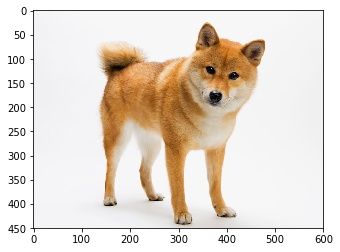

In [5]:
# Open the image we want to apply the filters to
doggo = Image.open("doggo_hd.jpg")
plt.imshow(doggo)
plt.show()

## Edge detection using Sobel operator
The Sobel 3x3 kernel has a horizontal and vertical mask. One way to improve edge detection is to convolve an image with both kernels, and combine the two! You can play around with the threshold values and try to fine-tune the edge detection. A better solution might be to loop through the combined image array and discard all pixels below a threshold there instead.

In [6]:
hori = convolve(doggo, sobel_h, threshold = 0) # get the horizontal lines
vert = convolve(doggo, sobel_v, threshold = 0) # get the vertical lines
combine = np.sqrt(np.add(np.square(hori), np.square(vert))) # combine the images

Horizontal Lines


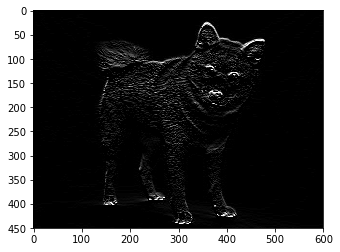

Vertical Lines


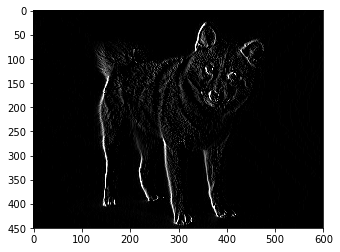

Combined


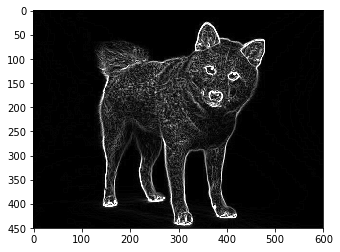

In [7]:
print("Horizontal Lines")
plt.imshow(Image.fromarray(hori).convert("RGB"))
plt.show()

print("Vertical Lines")
plt.imshow(Image.fromarray(vert).convert("RGB"))
plt.show()

print("Combined")
plt.imshow(Image.fromarray(combine).convert("RGB"))
plt.show()

## Animating the convolution process
Warning: If you're doing this with large pictures, surround lines 18-35 of the `convolve_gif()` function with an if statement...

`if row % x == 0 and col % y == 0`

... where x and y are an appropriate amount of pixels to skip, depending on your image size. Otherwise, you might end up with hundreds of thousands of photos, taking up a lot of memory on your computer.

For this example, we'll be using a 25 x 25 pixel image, so we'll end up with 529 photos (23 x 23 due to the 1 pixel buffer on every side when we use a 3x3 kernel). We will also be using the laplacian kernel, since it only needs to be run once to detect edges (although the edge detection is arguably less accurate)

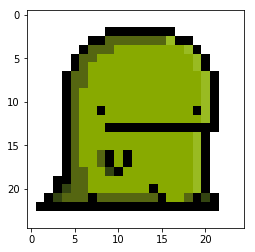

In [8]:
# Open the image we want to apply the filters to
dino = Image.open("dino.png")
plt.imshow(dino)
plt.show()

In [9]:
# Run the convolve_gif function!
# The pictures will be saved under the current working directory
# as 'dino_orig.gif' and 'dino_conv.gif'. You can change the file
# names in line 43 and 44 of the convolve_gif function.
#
# You'll also have a bunch of photos in /gif and /gif2. 
# You can delete these, as the gifs will have already been generated.

dino_conv = convolve_gif(dino, laplace)

gifs generated!
